# Análisis estadístico - Data set Evolución del pico del pajaro Finch en los Galapagos.

El Data set a analizar contiene mediciones del pico del pajaro Finch desde 1975, con este análisis queremos establecer si el pico del pajaro Finch ha cambiado con el pasar de los años.

In [1]:
# Importar las librerías a usar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar la data

# Data medidas del pico por especie de pajaro Finch
data2012 = 'https://assets.datacamp.com/production/course_1550/datasets/finch_beaks_2012.csv'

data1975 = 'https://assets.datacamp.com/production/course_1550/datasets/finch_beaks_1975.csv'

dataherencia = 'https://assets.datacamp.com/production/course_1550/datasets/fortis_beak_depth_heredity.csv'

In [3]:
data2012 = pd.read_csv(data2012, sep = ',')
data1975 = pd.read_csv(data1975, sep = ',')
dataherencia = pd.read_csv(dataherencia, sep = ',')

In [4]:
print(data2012.sample(10))
print(data1975.sample(10))
print(dataherencia.sample(10))

      band   species  blength  bdepth
109  21282    fortis     11.7     9.9
219  21167  scandens     12.7     8.3
243  21295  scandens     14.2     9.3
103  21265    fortis     11.8    10.2
59   19820    fortis     10.6     8.6
237  21286  scandens     12.4     8.4
50   19674    fortis     10.4     8.3
88   21090    fortis     10.0     8.2
145  19408  scandens     14.4     8.9
226  21260  scandens     13.9     9.3
     band species  Beak length, mm  Beak depth, mm
283  1368  fortis            11.73            10.2
28    345  fortis             9.90             8.4
245   907  fortis            10.20             8.2
41    369  fortis            10.20             9.0
87    503  fortis            10.00             9.1
155   676  fortis            11.00             9.7
143   624  fortis            11.70            10.1
197   788  fortis            10.40             8.9
85    501  fortis            10.50             9.9
141   622  fortis            10.90             9.2
     Mid-offspr  Male

In [6]:
scandens2012 = data2012.loc[data2012['species']=='scandens']
scandens2012.head()

,band,species,blength,bdepth
121,19026,scandens,14.3,9.4
122,19028,scandens,12.5,8.9
123,19029,scandens,13.7,9.5
124,19094,scandens,13.8,11.0
125,19122,scandens,12.0,8.7


In [7]:
scandens1975 = data1975.loc[data1975['species']=='scandens']
type(scandens1975)

pandas.core.frame.DataFrame

In [8]:
scandens2012['year'] = '2012'
scandens1975['year'] = '1975'

C:\Users\pcc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pcc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
scandens1975.columns = ['band','species','blength','bdepth','year']

In [10]:
scandens1975.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 316 to 402
Data columns (total 5 columns):
band       87 non-null int64
species    87 non-null object
blength    87 non-null float64
bdepth     87 non-null float64
year       87 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 4.1+ KB


In [28]:
scandens1975.describe()

,band,blength,bdepth
count,87.000000,87.000000,87.000000
mean,2985.264368,14.120920,8.960000
std,6309.578017,0.754789,0.566595
min,302.000000,12.800000,7.900000
25%,405.000000,13.500000,8.550000
50%,570.000000,14.000000,9.000000
75%,917.000000,14.740000,9.250000
max,20279.000000,15.940000,10.400000


In [12]:
scandens2012.describe()

,band,blength,bdepth
count,127.000000,127.000000,127.000000
mean,20145.086614,13.421024,9.186220
std,841.243307,0.720393,0.669241
min,19026.000000,11.400000,7.700000
25%,19477.500000,13.000000,8.800000
50%,19766.000000,13.400000,9.200000
75%,21133.000000,13.900000,9.600000
max,21347.000000,15.200000,11.000000


In [13]:
scandens2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 121 to 247
Data columns (total 5 columns):
band       127 non-null int64
species    127 non-null object
blength    127 non-null float64
bdepth     127 non-null float64
year       127 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 6.0+ KB


In [14]:
juntos = [scandens1975, scandens2012]
databeak = pd.concat(juntos, ignore_index = True)
print(databeak.sample(10))
print(databeak.info())

      band   species  blength  bdepth  year
19     365  scandens    13.80    8.60  1975
188  21253  scandens    14.10   10.00  2012
202  21285  scandens    13.80   10.50  2012
59     784  scandens    13.10    8.10  1975
97   19214  scandens    12.95    8.85  2012
115  19438  scandens    14.90   10.00  2012
119  19486  scandens    13.40    9.20  2012
55     728  scandens    14.60    9.00  1975
203  21286  scandens    12.40    8.40  2012
37     508  scandens    14.00    9.10  1975
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 5 columns):
band       214 non-null int64
species    214 non-null object
blength    214 non-null float64
bdepth     214 non-null float64
year       214 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 8.4+ KB
None


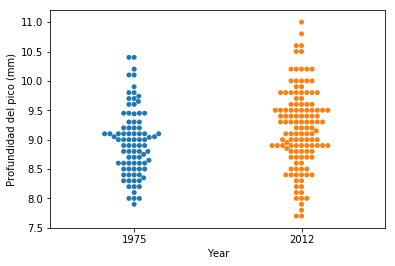

In [15]:
# Iniciaremos el análisis con un swarmplot para explorar las diferencias entre las mediciones
# de la profundidad del pico tomadas en 1975 y las tomadas en 2012.

_ = sns.swarmplot(x='year', y= 'bdepth', data = databeak)
_ = plt.xlabel('Year')
_ = plt.ylabel('Profundidad del pico (mm)')
plt.show()

Con el Swarmbee plot podemos inferir visualmente que las medidas tomadas en 2012 tienen una media mayor a las tomadas en 1975.

### Calcular y graficar la ecdf.

In [16]:
def ecdf(data):
    
    # Numero de datos de la data
    n = len(data)

    # Se ordenan los datos y esto genera el eje x
    x = np.sort(data)

    # se establece el porcentaje acumulado y esto genera el eje y
    y = np.arange(1, n+1) / n

    return x, y

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


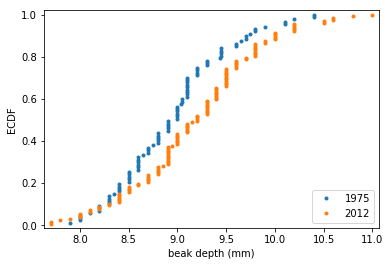

In [17]:

array_dbepth_1975 = np.array(scandens1975['bdepth'])
array_dbepth_2012 = np.array(scandens2012['bdepth'])

print(type(array_dbepth_1975))
print(type(array_dbepth_2012))

# Calcular los ejes x y y con la función ECDFs
x_1975, y_1975 = ecdf(array_dbepth_1975)
x_2012, y_2012 = ecdf(array_dbepth_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

Por la grafica ecdf podemos inferir que las mediciones tomadas de la profundidad de los picos en 2012 es mayor que las tomadas en 1975.

### Calcular la diferencia en medias y los intervalos de confianza.

In [18]:
# 1. Calculamos la diferencia entre las medias de ambos data sets (mediacions reales)
diferencia_en_medias_reales = np.mean(array_dbepth_2012) - np.mean(array_dbepth_1975)
diferencia_en_medias_reales

0.22622047244094645

In [19]:
# Con estas funciónes generamos n simulaciones del data set requerido y se calculan
# el estadistico requerido para ser comparado con el estadistico real.

def generar_boostrap_estadistico(data, func):
    return func(np.random.choice(data, size=len(data)))

def almacenamiento_estadisticos_boostrapping(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = generar_boostrap_estadistico(data, func)

    return bs_replicates

In [20]:
# 2. Generamos 10.000 simulaciones con data set boostrap 
#y calculamos las medias de esas simulaciones

bs_estadisticos_1975 = almacenamiento_estadisticos_boostrapping(array_dbepth_1975, np.mean, 10000)
bs_estadisticos_2012 = almacenamiento_estadisticos_boostrapping(array_dbepth_2012, np.mean, 10000)


In [21]:
bs_estadisticos_1975

array([8.91045977, 8.83931034, 8.98045977, ..., 8.93011494, 8.98655172,
       8.85264368])

In [22]:
bs_estadisticos_2012

array([9.28582677, 9.13464567, 9.2023622 , ..., 9.1988189 , 9.21889764,
       9.27598425])

In [23]:
# 3. Una vez obtenido los estadísticos de ambos array se procede al calculo de las 
# diferencias entre las medias.

diferencia_en_medias_simuladas = bs_estadisticos_2012 - bs_estadisticos_1975

diferencia_en_medias_simuladas

array([0.375367  , 0.29533532, 0.22190243, ..., 0.26870396, 0.23234591,
       0.42334057])

In [24]:
# 4. Calcular el intervalo de confianza del 95% para las simulaciones

intervalo_de_confianza = np.percentile(diferencia_en_medias_simuladas, [2.5, 97.5])
intervalo_de_confianza

array([0.05826045, 0.38933351])

In [25]:
# 5. Imprimir los resultados
print('difference of means =', diferencia_en_medias_reales, 'mm')
print('95% confidence interval =', intervalo_de_confianza, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.05826045 0.38933351] mm


# Prueba de Hipótesis.

Es claro que las mediciones tomadas en 2012 presentan una mayor media que mas tomadas en 1975, pero eso aún no concluye nada, es posible que por azar las mediciones tomadas en 2012 casualmente hayan mostrado ese comportamiento pero que no necesariamente concluya que el pico de los pajaron Finch se hayan hecho mas profundo con el pasar de los años.

Para poder probar que no es azar sino que efectivamente es un proceso natural vamos a definir una hipótesis y vamos a aprobarla o a refutarla.

** Hipótesis: Las medias de ambos data set son iguales.**

OJO, la hipótesis no es si ambos data sets tienen la misma distribución, si quisieramos comprobar esto usaríamos una prueba de permutación, nos interesa saber es si las medias de ambos data sets efectivamente son diferentes mostrando las medias de las mediciones tomas en 2012 mayores que las medias de las mediciones de 1975.


Para saber si ambas medias son diferentes y no es producto del azar lo que hacemos es:

  1. Igualamos las medias para ambos data sets. Si yo quiero comprobar si ambos data set se comportan igual en las medias lo que tengo que hacer es simularlos en igualdad de condiciones.
    
  2. Simulamos 10.000 data sets y sus medias.

  3. Calculamos las diferencias de las medias entre los data sets.
    
  4. Comparamos esas diferencias simuladas versús la diferencia de media real (P-value) y de esta forma establezco la probabilidad de que las medias simuladas sean como mínimo la media real o mayor.

In [27]:
# Calculamos la media de los data set combinados
media_combinada = np.mean(np.concatenate((array_dbepth_1975, array_dbepth_2012)))

# Igualamos las medias en ambos data sets, le restamos la media propia y le adicionamos la combinada
array_dbepth_1975_media_unificada = array_dbepth_1975 - np.mean(array_dbepth_1975) + media_combinada
array_dbepth_2012_media_unificada = array_dbepth_2012 - np.mean(array_dbepth_2012) + media_combinada

# Generamos 10.000 simulaciones bootstrap de los data set y calculamos sus 10.000 medias
simulacion_medias_1975 = almacenamiento_estadisticos_boostrapping(array_dbepth_1975_media_unificada, np.mean, 10000)
simulacion_medias_2012 = almacenamiento_estadisticos_boostrapping(array_dbepth_2012_media_unificada, np.mean, 10000)

# Calculamos la diferencia de medias de las 10.000 simulaciones
diferencia_medias_sim_con_medias_iguales = simulacion_medias_2012 - simulacion_medias_1975

# Calculamos el p-value - Proporción de medias de la simulación que fueron al menos o mayores a la
# diferencia de medias de los dataset originales.
p = np.sum( diferencia_medias_sim_con_medias_iguales >= diferencia_en_medias_reales) / len(diferencia_medias_sim_con_medias_iguales)

# Print p-value
print('p =', p)

p = 0.0048


#### Significancia estadística.

** Un resultado es estadisticamente significativo cuando es improbable que haya sido producto del azar.**

En nuestro ejemplo:

La probabilidad de que la Hipótesis nula, la cual es **que las medias de ambos data sets son iguales**, es del 0.48%, es decir, es improbable que la diferencia entre las medias sea producto del azar y efectivamente es producto de la evolución que la produndidad de los picos de los pajaros Finch especie escandens sea mas profundo.

## Regresión linear.

Vamos a estudiar la influencia del crecimiento de la profundidad del pico versus la longitud del mismo, si el pico ha crecido en produndidaad posiblemente ha crecido en longitud.

In [29]:
array_dlength_1975 = np.array(scandens1975['blength'])
array_dlength_2012 = np.array(scandens2012['blength'])

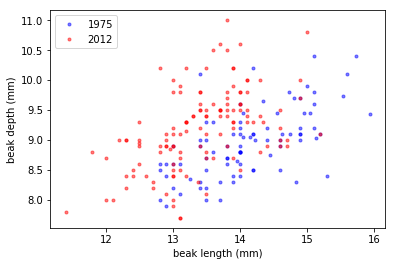

In [30]:
# Generación de un scatter plot para visualmente analizar el comportamiento 
# de la profundidad del pico versus su longitud
_ = plt.plot(array_dlength_1975, array_dbepth_1975, marker='.',
             linestyle='none', alpha = 0.5, color = 'blue')

_ = plt.plot(array_dlength_2012, array_dbepth_2012, marker='.',
             linestyle='none', alpha = 0.5, color = 'red')

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

La grafica esta comparando puntos en el tiempo, los azules son las mediciones en 1975 de longitud y profundidad y los rojos son las mediciones en 2012. 

Se puede inferir que las mediones del 2012 en efecto son mas profundas pero al parecer mas cortas que en 1975.

In [31]:
# Procederemos a calcular la pendiente y el intercepto de los data sets.
# Calcularemos también sus respectivos intervalos de confianza.


# Realizamos la regresión linear de los datos reales.
# En el eje x la longitud y en el eje y la profundidad, la que consideramos dependiente.
pendiente_1975, intercepto_1975 = np.polyfit(array_dlength_1975, array_dbepth_1975,1)
pendiente_2012, intercepto_2012 = np.polyfit(array_dlength_2012, array_dbepth_2012,1)

In [34]:
# La siguiente función calcula n pendeintes y n interceptos pertenecientes a 
# n simulaciones bootstrap de regresión linear, esto con el objetivo de establecer
# los intervalos de confianza de la pendiente y del intercepto reales.

def simu_bootst_regresion_linar(x, y, size=1):
    """Calcula la pendiente y el intercepto de una regresion linear."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    simulacion_pendientes = np.empty(size)
    simulacion_interceptos = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        simulacion_pendientes[i], simulacion_interceptos[i] = np.polyfit(bs_x,bs_y,1)

    return simulacion_pendientes, simulacion_interceptos

In [35]:
# Generar 1000 replicas o simulaciones

simulacion_pendientes_1975, simulacion_interceptos_1975 = simu_bootst_regresion_linar(array_dlength_1975, array_dbepth_1975, 1000)
simulacion_pendientes_2012, simulacion_interceptos_2012 = simu_bootst_regresion_linar(array_dlength_2012, array_dbepth_2012, 1000)


In [36]:
# Calculamos los intervalos de confianza de las pendientes y de los interceptos.
pendiente_conf_int_1975 = np.percentile(simulacion_pendientes_1975, [2.5,97.5])
pendiente_conf_int_2012 = np.percentile(simulacion_pendientes_2012, [2.5,97.5])
intercepto_conf_int_1975 = np.percentile(simulacion_interceptos_1975, [2.5,97.5])
intercepto_conf_int_2012 = np.percentile(simulacion_interceptos_2012, [2.5,97.5])

In [37]:
# Print the results
print('1975: Pendiente =', pendiente_1975,
      'conf int =', pendiente_conf_int_1975)
print('1975: Intercepto =', intercepto_1975,
      'conf int =', intercepto_conf_int_1975)
print('2012: Pendiente =', pendiente_2012,
      'conf int =', pendiente_conf_int_2012)
print('2012: intercept =', intercepto_2012,
      'conf int =', intercepto_conf_int_2012)

1975: Pendiente = 0.4652051691605937 conf int = [0.32663082 0.5891928 ]
1975: Intercepto = 2.390875236584226 conf int = [0.65274426 4.30650195]
2012: Pendiente = 0.462630358835313 conf int = [0.33121967 0.60280885]
2012: intercept = 2.977247498236019 conf int = [1.08032249 4.71355955]


### Interpretación.

Las pendientes de las mediciones de ambos años es practicamente la misma, la pendiente nos dice que por cada milímetro que aumenta la longitud del pico la produndidad aumentará en 0.46 mm para ambos años.

El intercepto nos dice que el valor mínimo de profundidad del pico es de 2.39 mm en 1975 y de 2.97 en 2012.

### Graficando los resultados de la regresión linear

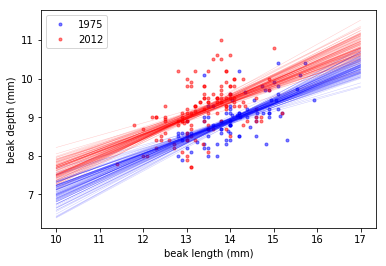

In [39]:
_ = plt.plot(array_dlength_1975, array_dbepth_1975, marker='.',
             linestyle='none', alpha = 0.5, color = 'blue')

_ = plt.plot(array_dlength_2012, array_dbepth_2012, marker='.',
             linestyle='none', alpha = 0.5, color = 'red')

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')
# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, x*simulacion_pendientes_1975[i] + simulacion_interceptos_1975[i] ,
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, x*simulacion_pendientes_2012[i] + simulacion_interceptos_2012[i] ,
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

In [ ]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / np.cov(parents)

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)

heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens,bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)